In [1]:
import numpy as np
import collections
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import csv
from numpy import *
import pandas as pd
from matplotlib import rc
# from load import *
### rcParams are the default parameters for matplotlib
import matplotlib as mpl
rc('mathtext',default='regular')


def ana_APD(datan):
	# sort along the first column which is the cell_ID

	datan = datan[datan[:, 0].argsort()]

	cell_ID = datan[:,0]
	data = datan[:,1:]

	# print(data is datan)

	dat1 = []
	dat2=[]
	dat3 = []
	for i in range(len(data[:,0])):
		Num = data[i, 66]
		# print(Num)
		num1=data[i, 1-1]
		num2=data[i, 23-1]
		num3=data[i, 45-1]
		# print num1, num2, num3
		key_value ={} 
		key_value[num1]=1-1;
		key_value[num2]=23-1;
		key_value[num3]=45-1;
		dat= sorted (key_value);
		# print key_value[dat[0]], key_value[dat[0]].get(1), 
		# print key_value
		# print dat, key_value[dat[0]]
		# dat1.append([])
		# dat2.append([])
		# dat3.append([])
		dat1.append(data[i, key_value[dat[0]]:(key_value[dat[0]]+22):1])
		# print data[i,key_value[dat[0]]:(key_value[dat[0]]+22):1]
		# print data[23:23+22,[i]]
		dat2.append(data[i, key_value[dat[1]]:(key_value[dat[1]]+22):1])
		dat3.append(data[i, key_value[dat[2]]:(key_value[dat[2]]+22):1])

	out1=np.array(dat1).transpose()
	# print out1[1]	# out1=
	# print out1[15]	# out1=
	return np.array(dat1).transpose(), np.array(dat2).transpose(), np.array(dat3).transpose(), cell_ID.astype(int)
	# print out1[:,1]
	# print out1[:,15]
	# print out1[3][1]
	# print len(out1[1])



# print dat[0,67]
# ana_APD(dat)
# ana_APD( pd.read_csv('Rate/log.baseline', delimiter=' ' ) )# doctest: +SKIP)
# a,b,c=ana_APD( np.genfromtxt('Rate/AP.log') )# doctest: +SKIP)



def get_APD(file):
	d1, d2,d3,cell_ID = ana_APD( np.genfromtxt(file) ) 


	# print(d1[2])
	# print(cell_ID)


	data = pd.DataFrame()

	data['ID'] = cell_ID
	data['APD1'] = d1[2]
	data['APD2'] = d2[2]
	data['APD3'] = d3[2]
	data['APD_mean'] = data[['APD1','APD2','APD3']].mean(axis=1)
	data['APD_50_mean'] = (d1[4] + d2[4] + d3[4]) / 3.0


	data['RMP1'] = d1[8]
	data['RMP2'] = d2[8]
	data['RMP3'] = d3[8]
	data['RMP_mean'] = data[['RMP1','RMP2','RMP3']].mean(axis=1)

	data['CaT1'] = (d1[15-1]-d1[16-1])*1000.0
	data['CaT2'] = (d2[15-1]-d2[16-1])*1000.0
	data['CaT3'] = (d3[15-1]-d3[16-1])*1000.0

	data['Vmax_mean'] = (d1[9]+d2[9]+d1[3])/3

	data['CaT_mean'] = data[['CaT1','CaT2','CaT3']].mean(axis=1)

	return data

In [2]:

d_1hz2000 = get_APD('Data/BCL.1000.ISO.0.CaMKII_inhb.0.CaMKII_db.0.APD.dat.2000')
d_2hz2000 = get_APD('Data/BCL.500.ISO.0.CaMKII_inhb.0.CaMKII_db.0.APD.dat.2000')


d_1hz10000 = get_APD('Data/BCL.1000.ISO.0.CaMKII_inhb.0.CaMKII_db.0.APD.dat.10000')
d_2hz10000 = get_APD('Data/BCL.500.ISO.0.CaMKII_inhb.0.CaMKII_db.0.APD.dat.10000')


d_1hz8000 = get_APD('Data/BCL.1000.ISO.0.CaMKII_inhb.0.CaMKII_db.0.APD.dat.8000')
d_2hz8000 = get_APD('Data/BCL.500.ISO.0.CaMKII_inhb.0.CaMKII_db.0.APD.dat.8000')


In [3]:
d_1hz10000['ID'] = d_1hz10000['ID']+2000
d_2hz10000['ID'] = d_2hz10000['ID']+2000
d_1hz8000['ID'] = d_1hz8000['ID']+2000 +10000
d_2hz8000['ID'] = d_2hz8000['ID']+2000 +10000


d_1hz = pd.concat([d_1hz2000, d_1hz10000, d_1hz8000], ignore_index=True)
d_2hz = pd.concat([d_2hz2000, d_2hz10000, d_2hz8000], ignore_index=True)

d_1hz['colors'] = ['0.6']*len(d_1hz)
# print(len(colors))

In [4]:
d_1hz.to_pickle('Data/BCL.1000.ISO.0.CaMKII_inhb.0.CaMKII_db.0.APD.dat.20000.pkl')
d_2hz.to_pickle('Data/BCL.500.ISO.0.CaMKII_inhb.0.CaMKII_db.0.APD.dat.20000.pkl')
# check whether cells are considered 'physiological'
sel =[]
for i in range(len(d_1hz)):
	if d_1hz.loc[i, 'APD_mean'] > 317.41 - 43.19*3 and d_1hz.loc[i, 'APD_mean'] < 317.41 + 43.19*3:   # APD90
		if d_1hz.loc[i, 'RMP_mean'] > -73.98 - 3.99*3 and d_1hz.loc[i, 'RMP_mean'] < -73.98 + 3.99*3:   # RMP
			if d_1hz.loc[i, 'APD_50_mean'] > 138.09 - 45.14*3 and d_1hz.loc[i, 'APD_50_mean'] < 138.09 + 45.14*3:   # APD50
				sel.append(i)


In [5]:
print(sel[0:1000])

[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 82, 83, 85, 86, 87, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 200, 201, 203, 204, 205, 206, 207, 208, 211, 212, 213, 214, 215, 216, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 241, 242, 243, 245, 248, 249,

In [6]:
d_1hz.loc[sel, 'colors'] = '0.3'

APD_baseline_1Hz = 288.2

APD_baseline_2Hz = 243.8
Vmax_baseline_1Hz = 223.3

Vmax_baseline_2Hz = 201.057599


RMP_baseline_1Hz = -79.8932625

CaT_baseline_1Hz = (0.000464790719-0.00020301639)*1000.0

RMP_baseline_2Hz = -82.6306163

CaT_baseline_2Hz = (0.000636447745-0.000259578755)*1000.0

Vmax_mean_1Hz = 223.396881

'''
## data with ISO and CKII_db
0 600 1000 351.3 287.8 101.6 4.7 3.2 35.7032659 -83.255242 247.304494 -12.1837943 -216.716632 599003 306.5 0.000992507057 0.000160364017 157.8 275.2 373.1 134 59.6 599014.2 601 1000 351.2 287.7 101.5 4.7 3.2 35.7139569 -83.2553768 247.351857 -12.1817138 -220.201858 600003 306.4 0.000990788504 0.000160362748 157.9 275.3 373.3 134.1 59.6 600014.2 599 1000 351.5 288.1 101.5 4.7 3.2 35.713352 -83.253702 247.420566 -12.1867463 -225.133642 598003 306.7 0.000994599141 0.000160432726 157.7 275 373 133.9 59.6 598014.2 601
0 1200 500 243.9 179.1 89.7 5.1 3.3 32.6167239 -85.0513502 223.932157 -13.0530682 -220.596018 599503.2 191.8 0.00107435311 0.000206511159 155.9 243.9 311.5 121.3 63.7 599514.9 1201 500.1 243.9 179.1 89.7 5.1 3.3 32.6156308 -85.0516303 223.817575 -13.0699357 -222.469 600003.2 191.8 0.0010743135 0.000206499096 155.8 243.8 311.4 121.3 63.6 600014.9 1202 500 243.9 179.1 89.7 5.1 3.3 32.6151354 -85.0516058 223.797806 -13.0699898 -222.809235 600503.2 191.8 0.00107429317 0.000206506912 155.8 243.8 311.5 121.5 63.4 600514.9 1202
0 1803 333.3 209.1 145.3 70.7 5.3 3.6 29.1930507 -83.1739207 198.085307 -15.3072537 -197.54021 600669.1 161.1 0.00115411382 0.00030409931 151.1 218.2 259.4 107.8 67.1 600683.7 1801 333.3 209 145.2 70.6 5.3 3.5 29.1980724 -83.1749763 196.965009 -15.3000354 -201.926608 600002.5 161 0.00115410034 0.000304105026 151.1 218.2 259.4 107.9 67.1 600017.1 1802 333.4 209.1 145.2 70.6 5.3 3.6 29.2018804 -83.1746659 206.36743 -15.3143043 -181.796836 600335.8 161 0.00115411268 0.000304063825 151 218.2 259.4 107.8 67.1 600350.4 1803
0 2403 250 186.6 131.2 63.2 6.5 4.4 21.2687601 -78.0961817 107.607394 -18.287858 -95.6938321 600502.9 154.4 0.000680841368 0.00033291688 151.8 201 222.9 101.2 70.2 600529.5 2404 250 186.6 131.2 63.2 6.5 4.4 21.268861 -78.0962528 107.627634 -18.2883336 -95.3750408 600752.9 154.4 0.000680855711 0.000332928428 151.8 201 222.9 101.2 70.2 600779.5 2402 250 186.6 131.2 63.2 6.5 4.4 21.2697862 -78.0933595 107.660741 -18.2890023 -94.9859312 600252.9 154.4 0.000680817516 0.000332906597 151.8 201 222.9 101.2 70.2 600279.5 2404

'''
RMP_ISO_CKII_db_1Hz = -83.255242
CaT_ISO_CKII_db_1Hz = (0.000992507057-0.000160364017)*1000
APD_ISO_CKII_db_1Hz = 351.3
Vmax_ISO_CKII_db_1Hz =  247.304494

RMP_ISO_CKII_db_2Hz = -85.0513502
CaT_ISO_CKII_db_2Hz = (0.00107435311-0.000206511159 )*1000
APD_ISO_CKII_db_2Hz = 243.9
Vmax_ISO_CKII_db_2Hz = 223.932157

# 0 1200 500 251 181 87.9 5 3.3 34.8179596 -85.4572067 244.595751 -12.7951786 -218.91807 599503.2 195.2 0.00115171471 0.000208847654 151.9 238.3 306 117.6 62.6 599515.1 1201 500.1 251 181 87.9 5 3.3 34.8234916 -85.45754 244.697519 -12.8129915 -218.660317 600003.2 195.2 0.00115169999 0.000208831722 151.8 238.2 306 117.6 62.5 600015.1 1202 499.9 251 181 87.9 5 3.3 34.8159081 -85.4571435 244.60126 -12.7952217 -221.992 600503.2 195.2 0.00115163205 0.000208860083 151.9 238.3 306.1 117.6 62.6 600515.1 1202
RMP_ISO_2Hz =  -85.4572067
CaT_ISO_2Hz = (0.00115171471-0.000208847654)*1000
APD_ISO_2Hz = 251
Vmax_ISO_2Hz = 244.595751



In [15]:
CaT_baseline_1Hz

0.261774329

In [7]:
sel_withCai =[]
for i in range(len(d_1hz)):
	if d_1hz.loc[i, 'APD_mean'] > 317.41 - 43.19*3 and d_1hz.loc[i, 'APD_mean'] < 317.41 + 43.19*3:   # APD90
		if d_1hz.loc[i, 'RMP_mean'] > -73.98 - 3.99*3 and d_1hz.loc[i, 'RMP_mean'] < -73.98 + 3.99*3:   # RMP
			if d_1hz.loc[i, 'APD_50_mean'] > 138.09 - 45.14*3 and d_1hz.loc[i, 'APD_50_mean'] < 138.09 + 45.14*3:   # APD50
				if d_1hz.loc[i, 'CaT_mean'] > CaT_baseline_1Hz*0.8 and d_1hz.loc[i, 'CaT_mean'] < CaT_baseline_1Hz*1.2: 
					sel_withCai.append(i)           
                

In [8]:

# load data at 2 Hz with ISO
d_2Hz_iso = pd.read_pickle("Data_ISO/BCL.500.ISO.0.1.CaMKII_inhb.0.CaMKII_db.0.APD.pkl")
d_2Hz_iso_CKII_db = get_APD('Data_ISO/BCL.500.ISO.0.1.CaMKII_inhb.0.CaMKII_db.1.APD.dat.20000')
d_2Hz_iso_CKII_inh = get_APD('Data_ISO/BCL.500.ISO.0.1.CaMKII_inhb.1.CaMKII_db.0.APD.dat.20000')



In [9]:
print(sel_withCai[0:1000])
print(len(sel_withCai))

[0, 4, 22, 38, 57, 60, 64, 66, 71, 91, 110, 112, 122, 125, 128, 137, 141, 148, 162, 163, 169, 171, 174, 175, 182, 183, 211, 216, 218, 219, 222, 223, 224, 225, 232, 239, 243, 249, 259, 261, 269, 270, 271, 274, 282, 285, 288, 298, 299, 301, 305, 306, 307, 308, 310, 315, 329, 330, 333, 342, 344, 345, 355, 366, 369, 378, 395, 396, 407, 413, 419, 422, 425, 427, 433, 435, 446, 456, 459, 460, 476, 481, 491, 494, 498, 500, 501, 503, 514, 526, 531, 532, 533, 535, 538, 547, 571, 580, 592, 598, 601, 620, 622, 625, 626, 643, 646, 650, 653, 660, 669, 681, 684, 693, 695, 699, 702, 703, 708, 715, 717, 719, 724, 728, 738, 744, 758, 761, 763, 779, 780, 786, 794, 797, 799, 804, 810, 827, 858, 860, 866, 871, 872, 884, 888, 892, 893, 897, 916, 929, 935, 948, 950, 967, 970, 979, 981, 989, 998, 1006, 1023, 1026, 1031, 1038, 1043, 1044, 1047, 1078, 1085, 1096, 1101, 1105, 1108, 1116, 1121, 1123, 1125, 1134, 1141, 1142, 1150, 1151, 1152, 1158, 1161, 1168, 1169, 1171, 1185, 1193, 1194, 1197, 1199, 1205, 1220, 

In [10]:
d_2Hz_iso

,ID,APD1,APD2,APD3,APD_mean,APD_50_mean,RMP1,RMP2,RMP3,RMP_mean,CaT1,CaT2,CaT3,Vmax_mean,CaT_mean
0,0,159.9,159.9,159.8,159.866667,38.600000,-74.645258,-74.661827,-74.657196,-74.654760,0.340060,0.338316,0.337334,46.059132,0.338570
1,1,229.5,229.4,229.4,229.433333,10.300000,-69.017550,-69.016471,-69.015930,-69.016650,0.016405,0.016401,0.016402,136.580954,0.016403
2,2,250.7,250.7,250.7,250.700000,87.200000,-83.872830,-83.872754,-83.871670,-83.872418,0.493318,0.493322,0.493273,170.003100,0.493304
3,3,234.6,234.6,234.6,234.600000,80.200000,-86.235458,-86.235828,-86.235314,-86.235533,0.314002,0.313989,0.313979,246.745473,0.313990
4,4,266.7,266.7,266.7,266.700000,135.300000,-86.893134,-86.893291,-86.893180,-86.893201,1.124624,1.124659,1.124704,207.844419,1.124663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,242.2,242.2,242.2,242.200000,70.400000,-80.895862,-80.896551,-80.897345,-80.896586,0.900313,0.900542,0.900747,189.253559,0.900534
19996,19996,245.4,245.4,245.4,245.400000,95.300000,-83.754369,-83.753815,-83.753016,-83.753734,0.474503,0.474450,0.474436,236.015904,0.474463
19997,19997,259.6,259.6,259.6,259.600000,77.900000,-85.503313,-85.502825,-85.502921,-85.503020,2.114951,2.114855,2.114797,276.393922,2.114868
19998,19998,216.2,216.2,216.2,216.200000,55.466667,-83.723342,-83.723406,-83.723487,-83.723411,1.380572,1.380466,1.380482,213.940007,1.380507


In [11]:
d_2Hz_iso_CKII_db

,ID,APD1,APD2,APD3,APD_mean,APD_50_mean,RMP1,RMP2,RMP3,RMP_mean,CaT1,CaT2,CaT3,Vmax_mean,CaT_mean
0,0,96.0,156.8,360.6,204.466667,36.733333,-79.019358,-76.228404,-77.604298,-77.617353,0.086970,0.695055,0.000000,58.571669,0.260675
1,1,197.9,197.9,197.9,197.900000,9.700000,-68.984114,-68.983353,-68.983250,-68.983572,0.013407,0.013406,0.013405,100.075637,0.013406
2,2,245.6,245.6,245.6,245.600000,89.000000,-84.002975,-84.002866,-84.003542,-84.003128,0.472383,0.472364,0.472346,156.788524,0.472364
3,3,231.2,231.2,231.2,231.200000,83.266667,-86.146298,-86.146077,-86.145867,-86.146081,0.298559,0.298551,0.298530,233.800402,0.298547
4,4,261.6,261.6,261.6,261.600000,135.100000,-86.436568,-86.437606,-86.436640,-86.436938,1.100140,1.100231,1.100201,200.006275,1.100191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,237.0,237.0,237.0,237.000000,71.200000,-80.835484,-80.835991,-80.836390,-80.835955,0.818744,0.818879,0.819067,177.240589,0.818897
19996,19996,242.7,242.7,242.7,242.700000,100.000000,-84.144689,-84.144561,-84.145124,-84.144791,0.473154,0.473137,0.473139,223.196259,0.473143
19997,19997,243.1,243.1,243.1,243.100000,78.366667,-84.307964,-84.308141,-84.308286,-84.308130,1.501788,1.501778,1.501816,261.834684,1.501794
19998,19998,209.1,209.1,209.1,209.100000,57.766667,-83.409187,-83.409435,-83.409588,-83.409403,1.125542,1.125536,1.125531,198.599405,1.125536


In [10]:
error = 0.15 # within 10% is considered 'no different'
RMP_Depo = 2 # 2 mV
PV_sel = []
# on check those that are considered 'physiological'
for i in sel:
	if d_1hz.loc[i, 'RMP_mean'] > RMP_baseline_1Hz + RMP_Depo:   # RMP more depolarized
		if d_1hz.loc[i, 'CaT_mean'] > CaT_baseline_1Hz *(1-error) and d_1hz.loc[i, 'CaT_mean'] < CaT_baseline_1Hz * (1+error):   # APD50
			if d_2hz.loc[i, 'CaT_mean'] > CaT_baseline_2Hz *(1-3*error) and d_2hz.loc[i, 'CaT_mean'] < CaT_baseline_2Hz * (1+3*error):   # APD50
				if d_1hz.loc[i, 'Vmax_mean'] < Vmax_mean_1Hz:   # APD50
					if d_2Hz_iso_CKII_db.loc[i, 'RMP_mean'] > RMP_ISO_CKII_db_2Hz + RMP_Depo:   # RMP more depolarized
						PV_sel.append(i)


In [11]:
error = 0.15 # within 10% is considered 'no different'
RMP_Depo = 2 # 2 mV
PV_sel_with_Ca = []
# on check those that are considered 'physiological'
for i in sel_withCai:
	if d_1hz.loc[i, 'RMP_mean'] > RMP_baseline_1Hz + RMP_Depo:   # RMP more depolarized
		if d_1hz.loc[i, 'CaT_mean'] > CaT_baseline_1Hz *(1-error) and d_1hz.loc[i, 'CaT_mean'] < CaT_baseline_1Hz * (1+error):   # APD50
			if d_2hz.loc[i, 'CaT_mean'] > CaT_baseline_2Hz *(1-3*error) and d_2hz.loc[i, 'CaT_mean'] < CaT_baseline_2Hz * (1+3*error):   # APD50
				if d_1hz.loc[i, 'Vmax_mean'] < Vmax_mean_1Hz:   # APD50
					if d_2Hz_iso_CKII_db.loc[i, 'RMP_mean'] > RMP_ISO_CKII_db_2Hz + RMP_Depo:   # RMP more depolarized
						PV_sel_with_Ca.append(i)

In [12]:
print(len(PV_sel_with_Ca),len(PV_sel))

np.array (PV_sel_with_Ca) - np.array (PV_sel)

446 446


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
print(PV_sel)

[148, 224, 239, 330, 369, 435, 460, 526, 533, 535, 620, 693, 717, 763, 892, 1031, 1125, 1142, 1150, 1158, 1169, 1197, 1223, 1235, 1242, 1298, 1340, 1424, 1472, 1484, 1523, 1644, 1734, 1745, 1755, 1801, 1849, 1890, 1951, 1978, 2079, 2102, 2127, 2193, 2259, 2285, 2400, 2435, 2445, 2452, 2462, 2530, 2558, 2593, 2596, 2629, 2699, 2721, 2801, 2861, 2874, 2964, 3038, 3051, 3081, 3096, 3110, 3132, 3259, 3262, 3404, 3457, 3499, 3504, 3519, 3570, 3673, 3679, 3680, 3737, 3741, 3769, 3800, 3860, 3950, 4002, 4135, 4138, 4164, 4192, 4198, 4207, 4213, 4272, 4341, 4374, 4500, 4526, 4581, 4609, 4614, 4675, 4693, 4711, 4738, 4750, 4799, 4833, 4880, 4940, 4980, 4984, 5240, 5303, 5308, 5346, 5400, 5401, 5486, 5515, 5561, 5627, 5631, 5699, 5779, 5799, 5802, 5809, 5862, 5997, 6058, 6059, 6173, 6185, 6195, 6210, 6241, 6288, 6304, 6390, 6420, 6464, 6479, 6493, 6519, 6550, 6570, 6575, 6628, 6721, 6887, 6909, 6992, 7069, 7076, 7091, 7120, 7135, 7173, 7249, 7305, 7308, 7359, 7409, 7435, 7436, 7507, 7512, 7514, 

In [14]:
print(np.mean(d_1hz.loc[PV_sel, 'APD_mean']))
print(np.std(d_1hz.loc[PV_sel, 'APD_mean']))

print(np.mean(d_1hz.loc[PV_sel, 'CaT_mean']))
print(np.std(d_1hz.loc[PV_sel, 'CaT_mean']))
# CaT_mean

print(np.mean(d_1hz.loc[PV_sel, 'RMP_mean']))
print(np.std(d_1hz.loc[PV_sel, 'RMP_mean']))

293.65156950672633
28.624913996786
0.26012928037518673
0.022451772291880435
-75.07198972249633
2.3181490599796026


In [16]:
d_1hz.loc[PV_sel, 'colors'] = 'b'


print(PV_sel)
print('length', len(PV_sel))

print(PV_sel_with_Ca)

d_2Hz_iso['colors'] = d_1hz['colors']
d_2Hz_iso_CKII_db['colors'] = d_1hz['colors']
d_2Hz_iso_CKII_inh['colors'] = d_1hz['colors']




[148, 224, 239, 330, 369, 435, 460, 526, 533, 535, 620, 693, 717, 763, 892, 1031, 1125, 1142, 1150, 1158, 1169, 1197, 1223, 1235, 1242, 1298, 1340, 1424, 1472, 1484, 1523, 1644, 1734, 1745, 1755, 1801, 1849, 1890, 1951, 1978, 2079, 2102, 2127, 2193, 2259, 2285, 2400, 2435, 2445, 2452, 2462, 2530, 2558, 2593, 2596, 2629, 2699, 2721, 2801, 2861, 2874, 2964, 3038, 3051, 3081, 3096, 3110, 3132, 3259, 3262, 3404, 3457, 3499, 3504, 3519, 3570, 3673, 3679, 3680, 3737, 3741, 3769, 3800, 3860, 3950, 4002, 4135, 4138, 4164, 4192, 4198, 4207, 4213, 4272, 4341, 4374, 4500, 4526, 4581, 4609, 4614, 4675, 4693, 4711, 4738, 4750, 4799, 4833, 4880, 4940, 4980, 4984, 5240, 5303, 5308, 5346, 5400, 5401, 5486, 5515, 5561, 5627, 5631, 5699, 5779, 5799, 5802, 5809, 5862, 5997, 6058, 6059, 6173, 6185, 6195, 6210, 6241, 6288, 6304, 6390, 6420, 6464, 6479, 6493, 6519, 6550, 6570, 6575, 6628, 6721, 6887, 6909, 6992, 7069, 7076, 7091, 7120, 7135, 7173, 7249, 7305, 7308, 7359, 7409, 7435, 7436, 7507, 7512, 7514, 

In [16]:
para = np.loadtxt('params/para_large_sigma.log.20000')


In [17]:
# print(para[PV_sel, :])
print(len(para[1,:]))
para_PV_sel = para[PV_sel,:]

25


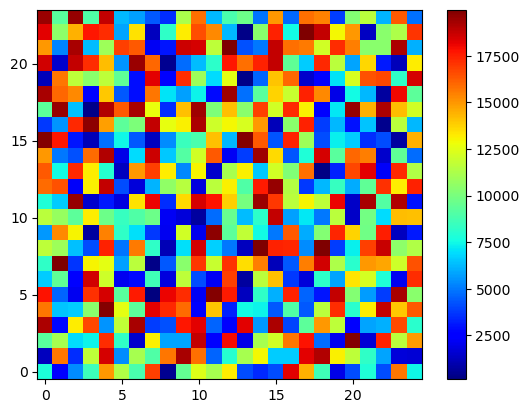

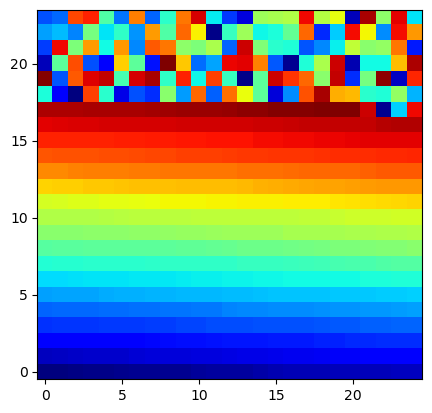

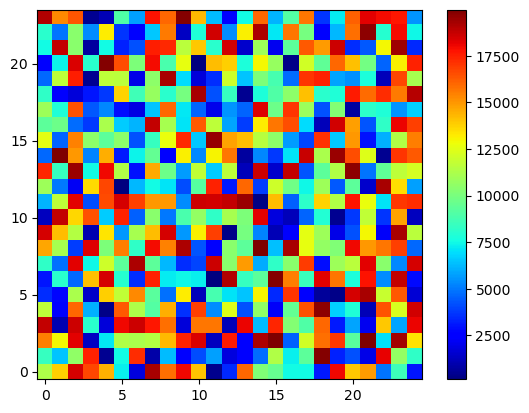

In [18]:
# para_PV_sel.tofile('para_PV_sel.dat')

np.random.seed(0)

np.savetxt('para_PV_sel.dat', para_PV_sel, fmt="%.6f", delimiter=" ")


# PV_pattern_map = np.random.choice(range(len(PV_sel)), 600, replace=True)
PV_pattern_map = np.random.choice(PV_sel, 600, replace=True)

plt.imshow(PV_pattern_map.reshape(24,25),aspect='equal',cmap='jet',origin='lower')
plt.colorbar()

plt.show()
np.savetxt('para_PV_pattern.dat', PV_pattern_map, fmt="%d", delimiter=" ")


PV_pattern_map_new = np.concatenate( (PV_sel,np.random.choice(PV_sel, 600-len(PV_sel), replace=True)))
plt.imshow(PV_pattern_map_new.reshape(24,25),aspect='equal',cmap='jet',origin='lower')
# plt.colorbar()

plt.figure()
PV_pattern_map_new_2 = np.random.choice(PV_pattern_map_new, 600, replace=False)
plt.imshow(PV_pattern_map_new_2.reshape(24,25),aspect='equal',cmap='jet',origin='lower')
plt.colorbar()
plt.savefig('PV_tissue_pattern_Map_2.png', dpi=300)


In [19]:
unique_values = np.unique(PV_pattern_map)

In [20]:
print(len(unique_values))

328


In [21]:
unique_values = np.unique(PV_pattern_map_new)
print(len(unique_values))
PV_pattern_map_new
np.savetxt('PV_pattern_map_new_2.dat', PV_pattern_map_new_2, fmt="%d", delimiter=" ")
np.savetxt('PV_pattern_map_new.dat', PV_pattern_map_new, fmt="%d", delimiter=" ")

np.savetxt('PV_440_blocks.dat', PV_sel[0:440], fmt="%d", delimiter=" ")


446


In [23]:
PV_sel_blocks_2 = np.random.choice(PV_sel[0:440], 440, replace=False);
print(len(unique_values))

446


In [24]:
np.savetxt('PV_440_blocks_2.dat', PV_sel_blocks_2, fmt="%d", delimiter=" ")

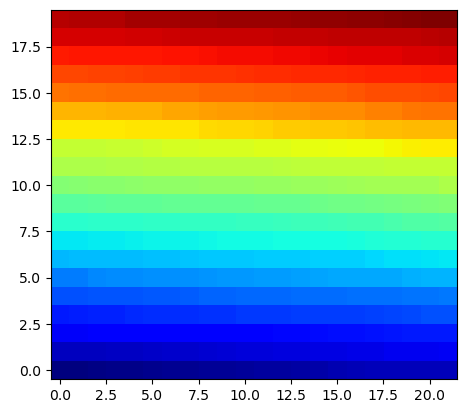

In [30]:
plt.imshow(np.array(PV_sel[0:440]).reshape(20,22),aspect='equal',cmap='jet',origin='lower')


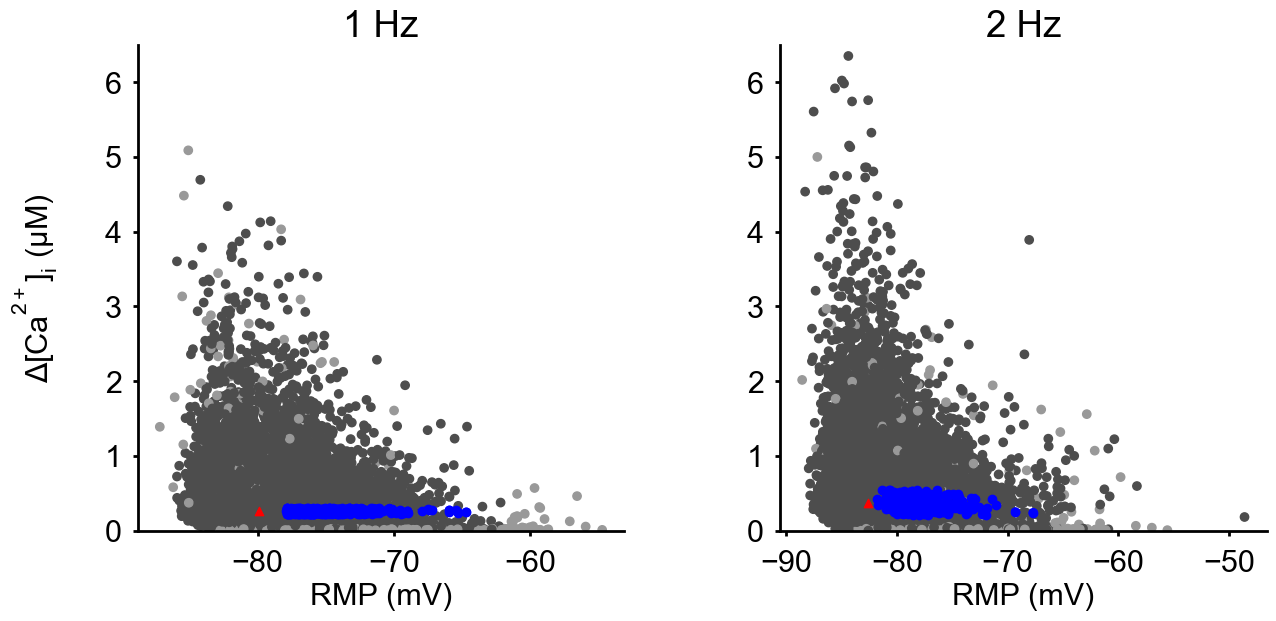

In [22]:

fonts = 22
fonts_title = 22
leng_fontsize = 22
mpl.rcParams['font.size'] = fonts
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['axes.labelsize'] = fonts
mpl.rcParams['xtick.labelsize'] = fonts
mpl.rcParams['ytick.labelsize'] = fonts
mpl.rcParams['axes.linewidth'] = 1.
mpl.rcParams['ytick.major.pad']='8'
mpl.rcParams['xtick.major.pad']='10'

Q10 = 2.0

Q10_Vact_Shift = 4.0
Q10_Inaact_Shift = 4.0
Temp = 22.0
# rc('text', usetex=True)
# rc('font',**{'family':'Times','sans-serif':['aria']})

xpos = -0.4
ypos = 0.5
lblsize = 22
boldness = 500
ticklblsize = 18
transparency = 1.0

###################################################################################
fig = plt.figure(figsize=(8.4*1.6,6.15))
num_row = 1;
num_col = 2;
gs1 = gridspec.GridSpec(num_row,num_col);
panel = {};

for i in np.arange(num_row):
	for j in np.arange(num_col):
		panel[i,j] = plt.subplot(gs1[i,j]);
		ax = panel[i,j];


ax = panel[0,0];
ax.scatter(d_1hz['RMP_mean'], d_1hz['CaT_mean'],c=d_1hz['colors'])

ax.scatter([RMP_baseline_1Hz], [CaT_baseline_1Hz], marker='^', c='r')

ax.scatter(d_1hz.loc[PV_sel,'RMP_mean'], d_1hz.loc[PV_sel,'CaT_mean'],c='b')
ax.set_title('1 Hz')
ax.set_xlabel('RMP (mV)')
ax.set_ylabel('$\Delta[Ca^{2+}]_i$ ($\mu M$)')
ax.set_ylim([0,6.5])

ax = panel[0,1];
ax.scatter(d_2hz['RMP_mean'], d_2hz['CaT_mean'],c=d_1hz['colors'])  # using color defined by checking data at 1 Hz

ax.scatter(d_2hz.loc[PV_sel,'RMP_mean'], d_2hz.loc[PV_sel,'CaT_mean'],c='b')
ax.scatter([RMP_baseline_2Hz], [CaT_baseline_2Hz], marker='^', c='r')
ax.set_title('2 Hz')
ax.set_xlabel('RMP (mV)')
ax.set_ylim([0,6.5])




for i in range(2):
	ax = fig.axes[i]
	# ax.spines['left'].set_position(('data', -100))
	ax.spines['right'].set_color('none')
	# ax.spines['bottom'].set_position(('data', 0))
	ax.spines['top'].set_color('none')
	# ax.spines['left'].set_smart_bounds(True)
	# ax.spines['bottom'].set_smart_bounds(True)
	ax.xaxis.set_ticks_position('bottom')
	ax.yaxis.set_ticks_position('left')
	ax.xaxis.set_tick_params(width=2)
	ax.yaxis.set_tick_params(width=2)

	# for i in range(0, len(sys.argv)-1):
	ax.spines['bottom'].set_linewidth(2)
	ax.spines['left'].set_linewidth(2)
	ax.spines['right'].set_linewidth(2)
	# 	norm = abs(min(IV[i][1]))
	# 	ax.plot(IV[i][0], IV[i][1]/norm, label=labels[i], lw=2)
	# ax.set_xlim(294000-50, 294000+500)
	# ax.set_xticks(np.linspace(1,20,6))
	plt.subplots_adjust(left=0.12, bottom=0.15, right=0.96, top=0.94,
		wspace=0.32, hspace=0.30)
	ax.yaxis.set_label_coords(-0.16, 0.5)

# plt.savefig('Ito_react.pdf')
plt.savefig('RMP_Ca2+.png', dpi=300)
plt.show()


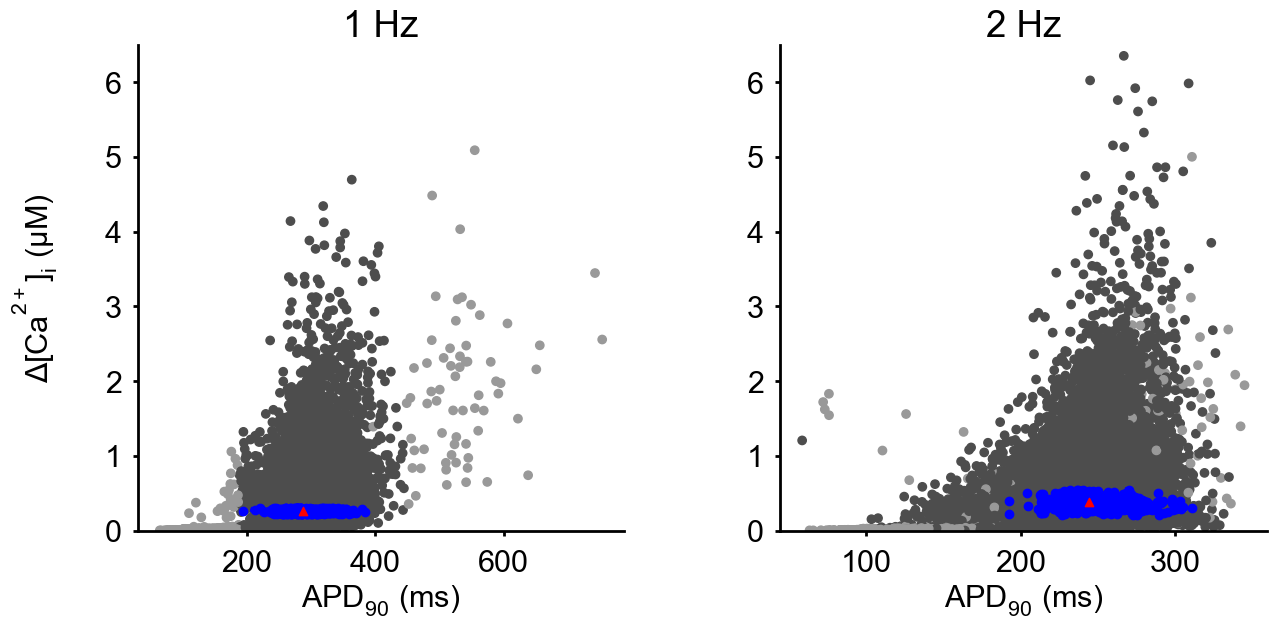

In [23]:
###################################################################################

fig = plt.figure(figsize=(8.4*1.6,6.15))
num_row = 1;
num_col = 2;
gs1 = gridspec.GridSpec(num_row,num_col);
panel = {};

for i in np.arange(num_row):
	for j in np.arange(num_col):
		panel[i,j] = plt.subplot(gs1[i,j]);
		ax = panel[i,j];


ax = panel[0,0];
ax.scatter(d_1hz['APD_mean'], d_1hz['CaT_mean'],c=d_1hz['colors'])


ax.scatter(d_1hz.loc[PV_sel,'APD_mean'], d_1hz.loc[PV_sel,'CaT_mean'],c='b')
ax.scatter([APD_baseline_1Hz], [CaT_baseline_1Hz], marker='^', c='r')
ax.set_title('1 Hz')
ax.set_xlabel('$APD_{90}$ (ms)')
ax.set_ylabel('$\Delta[Ca^{2+}]_i$ ($\mu M$)')
ax.set_ylim([0,6.5])

ax = panel[0,1];
ax.scatter(d_2hz['APD_mean'], d_2hz['CaT_mean'],c=d_1hz['colors'])  # using color defined by checking data at 1 Hz

ax.scatter(d_2hz.loc[PV_sel,'APD_mean'], d_2hz.loc[PV_sel,'CaT_mean'],c='b')
ax.scatter([APD_baseline_2Hz], [CaT_baseline_2Hz], marker='^', c='r')
ax.set_title('2 Hz')
ax.set_xlabel('$APD_{90}$ (ms)')
ax.set_ylim([0,6.5])




for i in range(2):
	ax = fig.axes[i]
	# ax.spines['left'].set_position(('data', -100))
	ax.spines['right'].set_color('none')
	# ax.spines['bottom'].set_position(('data', 0))
	ax.spines['top'].set_color('none')
	# ax.spines['left'].set_smart_bounds(True)
	# ax.spines['bottom'].set_smart_bounds(True)
	ax.xaxis.set_ticks_position('bottom')
	ax.yaxis.set_ticks_position('left')
	ax.xaxis.set_tick_params(width=2)
	ax.yaxis.set_tick_params(width=2)

	# for i in range(0, len(sys.argv)-1):
	ax.spines['bottom'].set_linewidth(2)
	ax.spines['left'].set_linewidth(2)
	ax.spines['right'].set_linewidth(2)
	# 	norm = abs(min(IV[i][1]))
	# 	ax.plot(IV[i][0], IV[i][1]/norm, label=labels[i], lw=2)
	# ax.set_xlim(294000-50, 294000+500)
	# ax.set_xticks(np.linspace(1,20,6))
	plt.subplots_adjust(left=0.12, bottom=0.15, right=0.96, top=0.94,
		wspace=0.32, hspace=0.30)
	ax.yaxis.set_label_coords(-0.16, 0.5)

# plt.savefig('Ito_react.pdf')
plt.savefig('APD_Ca2+.png', dpi=300)
plt.show()


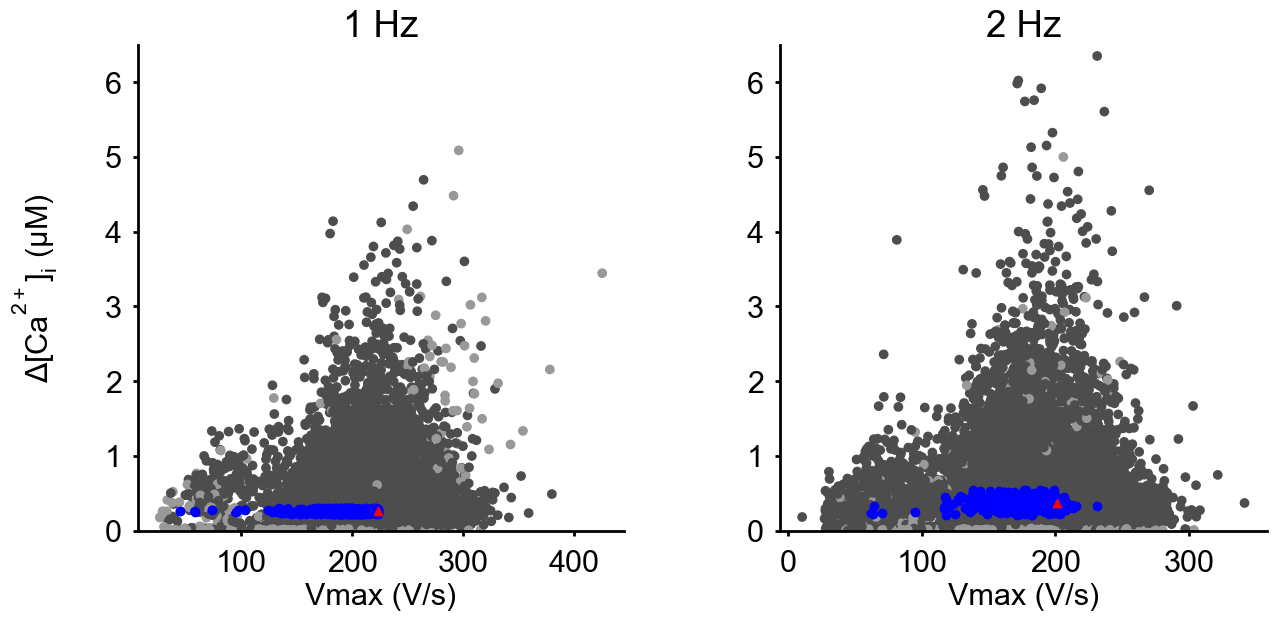

In [24]:
###################################################################################


fig = plt.figure(figsize=(8.4*1.6,6.15))
num_row = 1;
num_col = 2;
gs1 = gridspec.GridSpec(num_row,num_col);
panel = {};

for i in np.arange(num_row):
	for j in np.arange(num_col):
		panel[i,j] = plt.subplot(gs1[i,j]);
		ax = panel[i,j];


ax = panel[0,0];
ax.scatter(d_1hz['Vmax_mean'], d_1hz['CaT_mean'],c=d_1hz['colors'])


ax.scatter(d_1hz.loc[PV_sel,'Vmax_mean'], d_1hz.loc[PV_sel,'CaT_mean'],c='b')
ax.scatter([Vmax_baseline_1Hz], [CaT_baseline_1Hz], marker='^', c='r')
ax.set_title('1 Hz')
ax.set_xlabel('Vmax (V/s)')
ax.set_ylabel('$\Delta[Ca^{2+}]_i$ ($\mu M$)')
ax.set_ylim([0,6.5])

ax = panel[0,1];
ax.scatter(d_2hz['Vmax_mean'], d_2hz['CaT_mean'],c=d_1hz['colors'])  # using color defined by checking data at 1 Hz

ax.scatter(d_2hz.loc[PV_sel,'Vmax_mean'], d_2hz.loc[PV_sel,'CaT_mean'],c='b')
ax.scatter([Vmax_baseline_2Hz], [CaT_baseline_2Hz], marker='^', c='r')
ax.set_title('2 Hz')
ax.set_xlabel('Vmax (V/s)')
ax.set_ylim([0,6.5])




for i in range(2):
	ax = fig.axes[i]
	# ax.spines['left'].set_position(('data', -100))
	ax.spines['right'].set_color('none')
	# ax.spines['bottom'].set_position(('data', 0))
	ax.spines['top'].set_color('none')
	# ax.spines['left'].set_smart_bounds(True)
	# ax.spines['bottom'].set_smart_bounds(True)
	ax.xaxis.set_ticks_position('bottom')
	ax.yaxis.set_ticks_position('left')
	ax.xaxis.set_tick_params(width=2)
	ax.yaxis.set_tick_params(width=2)

	# for i in range(0, len(sys.argv)-1):
	ax.spines['bottom'].set_linewidth(2)
	ax.spines['left'].set_linewidth(2)
	ax.spines['right'].set_linewidth(2)
	# 	norm = abs(min(IV[i][1]))
	# 	ax.plot(IV[i][0], IV[i][1]/norm, label=labels[i], lw=2)
	# ax.set_xlim(294000-50, 294000+500)
	# ax.set_xticks(np.linspace(1,20,6))
	plt.subplots_adjust(left=0.12, bottom=0.15, right=0.96, top=0.94,
		wspace=0.32, hspace=0.30)
	ax.yaxis.set_label_coords(-0.16, 0.5)

# plt.savefig('Ito_react.pdf')
plt.savefig('Vmax_Ca2+.png', dpi=300)
plt.show()


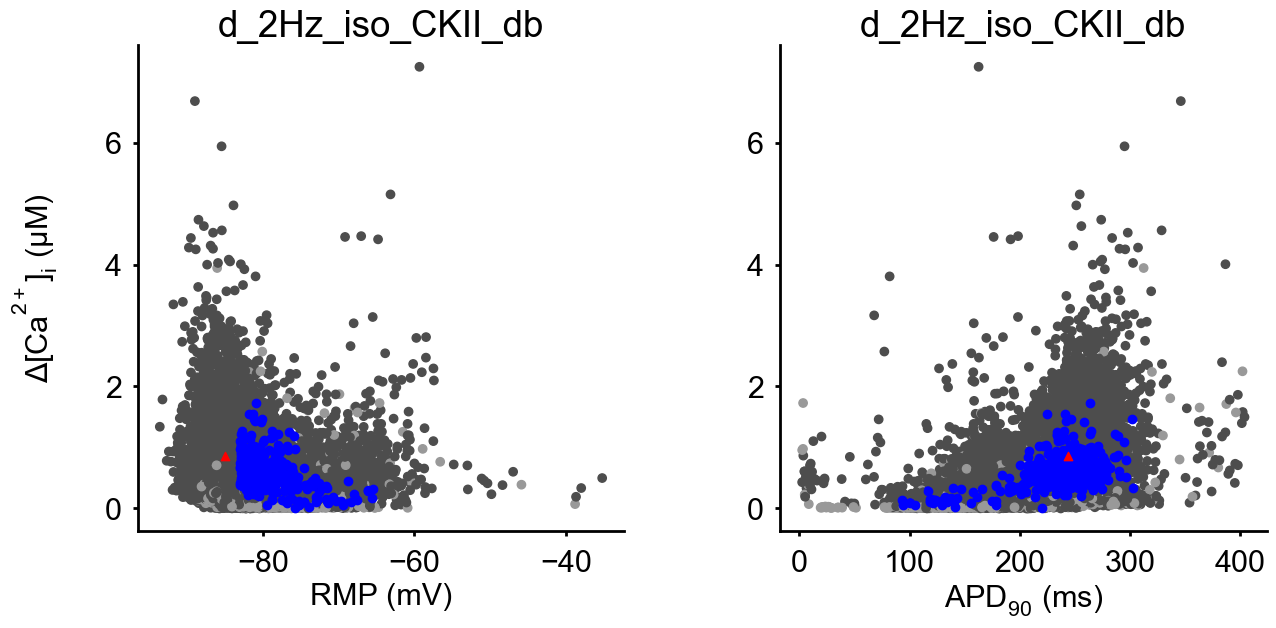

In [25]:
###################################################################################
fig = plt.figure(figsize=(8.4*1.6,6.15))
num_row = 1;
num_col = 2;
gs1 = gridspec.GridSpec(num_row,num_col);
panel = {};

for i in np.arange(num_row):
	for j in np.arange(num_col):
		panel[i,j] = plt.subplot(gs1[i,j]);
		ax = panel[i,j];


ax = panel[0,0];



ax.scatter(d_2Hz_iso_CKII_db['RMP_mean'], d_2Hz_iso_CKII_db['CaT_mean'],c=d_2Hz_iso_CKII_db['colors'])

ax.scatter(d_2Hz_iso_CKII_db.loc[PV_sel,'RMP_mean'], d_2Hz_iso_CKII_db.loc[PV_sel,'CaT_mean'],c='b')
ax.scatter([RMP_ISO_CKII_db_2Hz], [CaT_ISO_CKII_db_2Hz], marker='^', c='r')

ax.set_title('d_2Hz_iso_CKII_db')
ax.set_xlabel('RMP (mV)')
ax.set_ylabel('$\Delta[Ca^{2+}]_i$ ($\mu M$)')
# ax.set_ylim([0,6.5])

ax = panel[0,1];
ax.scatter(d_2Hz_iso_CKII_db['APD_mean'], d_2Hz_iso_CKII_db['CaT_mean'],c=d_2Hz_iso_CKII_db['colors'])  # using color defined by checking data at 1 Hz

ax.scatter(d_2Hz_iso_CKII_db.loc[PV_sel,'APD_mean'], d_2Hz_iso_CKII_db.loc[PV_sel,'CaT_mean'],c='b')
ax.scatter([APD_ISO_CKII_db_2Hz], [CaT_ISO_CKII_db_2Hz], marker='^', c='r')
ax.set_title('d_2Hz_iso_CKII_db')
ax.set_xlabel('$APD_{90}$ (ms)')
# ax.set_ylim([0,6.5])




for i in range(2):
	ax = fig.axes[i]
	# ax.spines['left'].set_position(('data', -100))
	ax.spines['right'].set_color('none')
	# ax.spines['bottom'].set_position(('data', 0))
	ax.spines['top'].set_color('none')
	# ax.spines['left'].set_smart_bounds(True)
	# ax.spines['bottom'].set_smart_bounds(True)
	ax.xaxis.set_ticks_position('bottom')
	ax.yaxis.set_ticks_position('left')
	ax.xaxis.set_tick_params(width=2)
	ax.yaxis.set_tick_params(width=2)

	# for i in range(0, len(sys.argv)-1):
	ax.spines['bottom'].set_linewidth(2)
	ax.spines['left'].set_linewidth(2)
	ax.spines['right'].set_linewidth(2)

	plt.subplots_adjust(left=0.12, bottom=0.15, right=0.96, top=0.94,
		wspace=0.32, hspace=0.30)
	ax.yaxis.set_label_coords(-0.16, 0.5)

# plt.savefig('Ito_react.pdf')
plt.savefig('d_2Hz_iso_CKII_RMP_Ca2+.png', dpi=300)
plt.show()


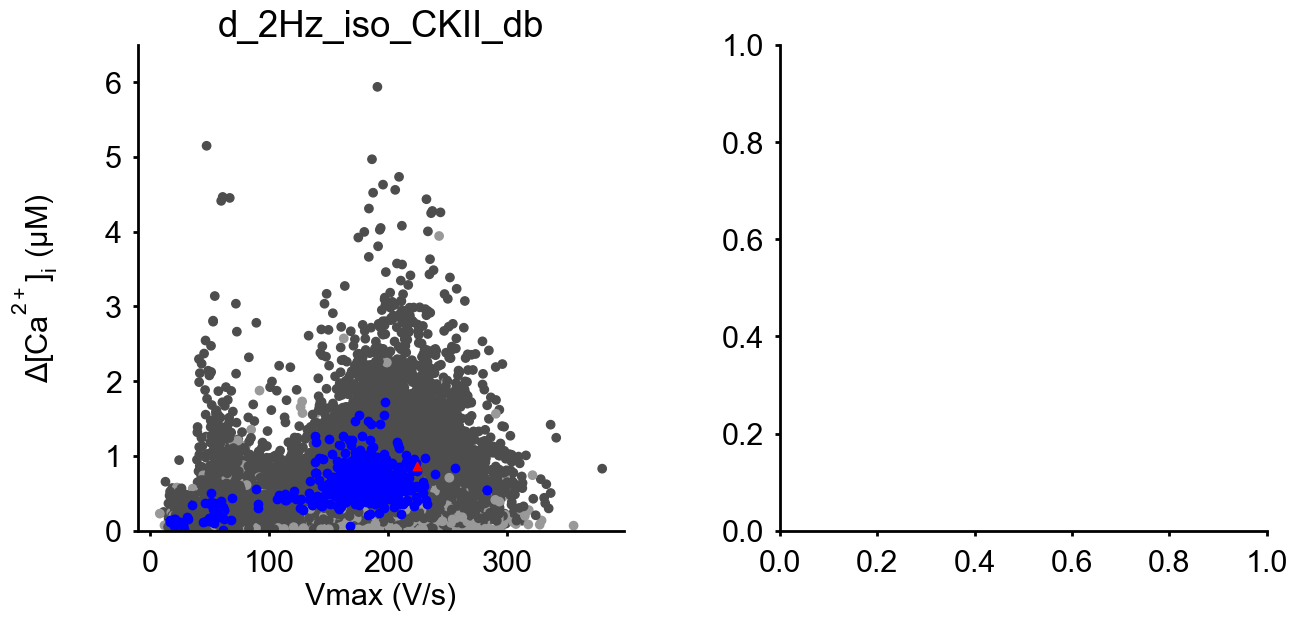

In [26]:



###################################################################################
fig = plt.figure(figsize=(8.4*1.6,6.15))
num_row = 1;
num_col = 2;
gs1 = gridspec.GridSpec(num_row,num_col);
panel = {};

for i in np.arange(num_row):
	for j in np.arange(num_col):
		panel[i,j] = plt.subplot(gs1[i,j]);
		ax = panel[i,j];


ax = panel[0,0];



ax.scatter(d_2Hz_iso_CKII_db['Vmax_mean'], d_2Hz_iso_CKII_db['CaT_mean'],c=d_2Hz_iso_CKII_db['colors'])

ax.scatter(d_2Hz_iso_CKII_db.loc[PV_sel,'Vmax_mean'], d_2Hz_iso_CKII_db.loc[PV_sel,'CaT_mean'],c='b')
ax.scatter([Vmax_ISO_CKII_db_2Hz], [CaT_ISO_CKII_db_2Hz], marker='^', c='r')

ax.set_title('d_2Hz_iso_CKII_db')
# ax.set_xlabel('RMP (mV)')
ax.set_xlabel('Vmax (V/s)')
ax.set_ylabel('$\Delta[Ca^{2+}]_i$ ($\mu M$)')
ax.set_ylim([0,6.5])

# ax = panel[0,1];
# ax.scatter(d_2hz['RMP_mean'], d_2hz['CaT_mean'],c=d_1hz['colors'])  # using color defined by checking data at 1 Hz

# ax.scatter(d_2hz.loc[PV_sel,'RMP_mean'], d_2hz.loc[PV_sel,'CaT_mean'],c='b')
# ax.scatter([RMP_baseline_2Hz], [CaT_baseline_2Hz], marker='^', c='r')
# ax.set_title('2 Hz')
# ax.set_xlabel('RMP (mV)')
# ax.set_ylim([0,6.5])




for i in range(2):
	ax = fig.axes[i]
	# ax.spines['left'].set_position(('data', -100))
	ax.spines['right'].set_color('none')
	# ax.spines['bottom'].set_position(('data', 0))
	ax.spines['top'].set_color('none')
	# ax.spines['left'].set_smart_bounds(True)
	# ax.spines['bottom'].set_smart_bounds(True)
	ax.xaxis.set_ticks_position('bottom')
	ax.yaxis.set_ticks_position('left')
	ax.xaxis.set_tick_params(width=2)
	ax.yaxis.set_tick_params(width=2)

	# for i in range(0, len(sys.argv)-1):
	ax.spines['bottom'].set_linewidth(2)
	ax.spines['left'].set_linewidth(2)
	ax.spines['right'].set_linewidth(2)
	# 	norm = abs(min(IV[i][1]))
	# 	ax.plot(IV[i][0], IV[i][1]/norm, label=labels[i], lw=2)
	# ax.set_xlim(294000-50, 294000+500)
	# ax.set_xticks(np.linspace(1,20,6))
	plt.subplots_adjust(left=0.12, bottom=0.15, right=0.96, top=0.94,
		wspace=0.32, hspace=0.30)
	ax.yaxis.set_label_coords(-0.16, 0.5)

# plt.savefig('Ito_react.pdf')
plt.savefig('d_2Hz_iso_CKII_db_Vmax_Ca2+.png', dpi=300)
plt.show()


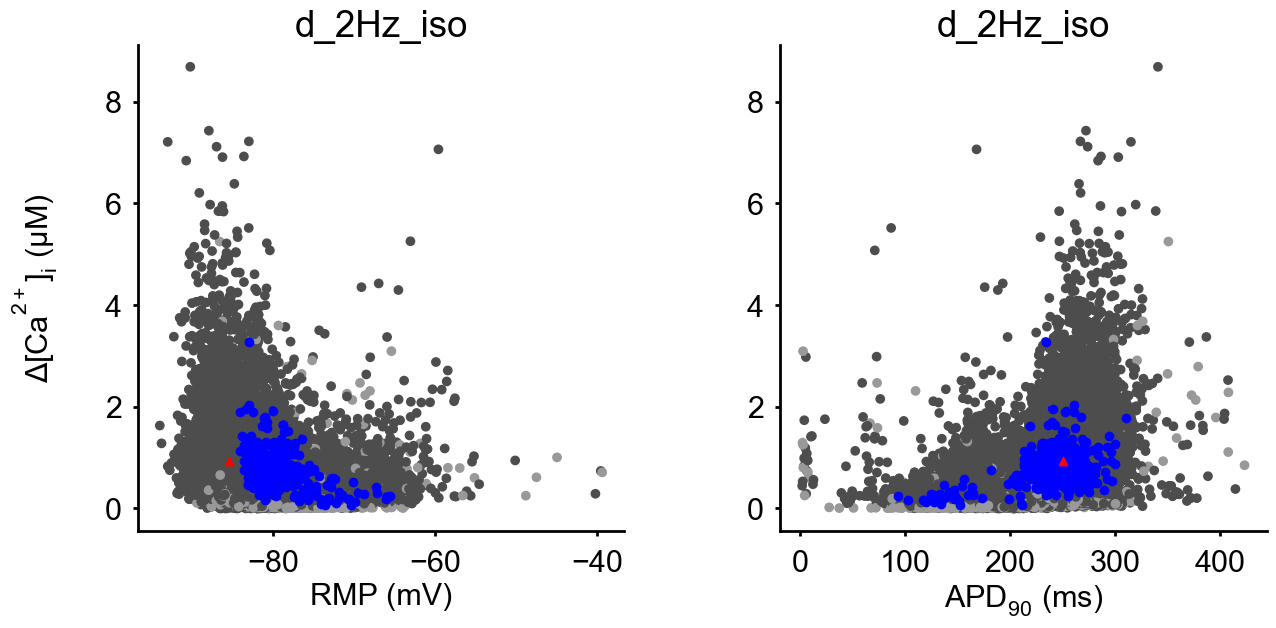

In [27]:
###################################################################################
fig = plt.figure(figsize=(8.4*1.6,6.15))
num_row = 1;
num_col = 2;
gs1 = gridspec.GridSpec(num_row,num_col);
panel = {};

for i in np.arange(num_row):
	for j in np.arange(num_col):
		panel[i,j] = plt.subplot(gs1[i,j]);
		ax = panel[i,j];


ax = panel[0,0];



ax.scatter(d_2Hz_iso['RMP_mean'], d_2Hz_iso['CaT_mean'],c=d_2Hz_iso['colors'])

ax.scatter(d_2Hz_iso.loc[PV_sel,'RMP_mean'], d_2Hz_iso.loc[PV_sel,'CaT_mean'],c='b')
ax.scatter([RMP_ISO_2Hz], [CaT_ISO_2Hz], marker='^', c='r')

ax.set_title('d_2Hz_iso')
ax.set_xlabel('RMP (mV)')
ax.set_ylabel('$\Delta[Ca^{2+}]_i$ ($\mu M$)')
# ax.set_ylim([0,6.5])

ax = panel[0,1];
ax.scatter(d_2Hz_iso['APD_mean'], d_2Hz_iso['CaT_mean'],c=d_2Hz_iso['colors'])  # using color defined by checking data at 1 Hz

ax.scatter(d_2Hz_iso.loc[PV_sel,'APD_mean'], d_2Hz_iso.loc[PV_sel,'CaT_mean'],c='b')
ax.scatter([APD_ISO_2Hz], [CaT_ISO_2Hz], marker='^', c='r')
ax.set_title('d_2Hz_iso')
ax.set_xlabel('$APD_{90}$ (ms)')
# ax.set_ylim([0,6.5])




for i in range(2):
	ax = fig.axes[i]
	# ax.spines['left'].set_position(('data', -100))
	ax.spines['right'].set_color('none')
	# ax.spines['bottom'].set_position(('data', 0))
	ax.spines['top'].set_color('none')
	# ax.spines['left'].set_smart_bounds(True)
	# ax.spines['bottom'].set_smart_bounds(True)
	ax.xaxis.set_ticks_position('bottom')
	ax.yaxis.set_ticks_position('left')
	ax.xaxis.set_tick_params(width=2)
	ax.yaxis.set_tick_params(width=2)

	# for i in range(0, len(sys.argv)-1):
	ax.spines['bottom'].set_linewidth(2)
	ax.spines['left'].set_linewidth(2)
	ax.spines['right'].set_linewidth(2)

	plt.subplots_adjust(left=0.12, bottom=0.15, right=0.96, top=0.94,
		wspace=0.32, hspace=0.30)
	ax.yaxis.set_label_coords(-0.16, 0.5)

# plt.savefig('Ito_react.pdf')
plt.savefig('d_2Hz_iso_RMP_Ca2+.png', dpi=300)
plt.show()

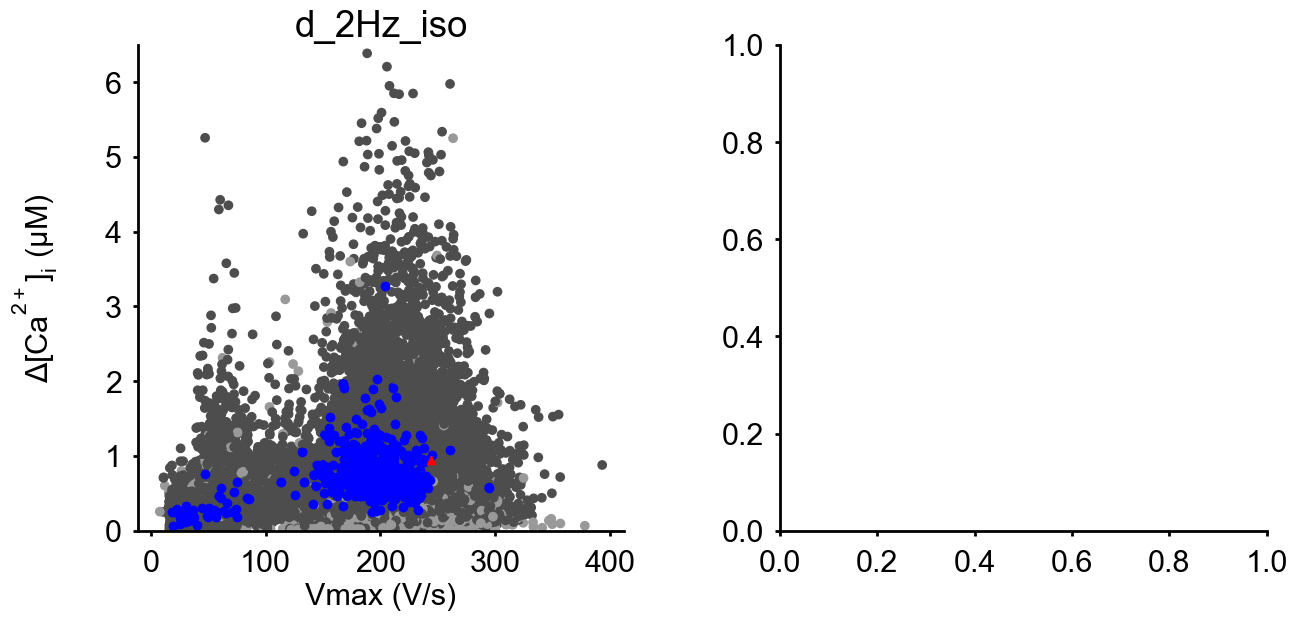

In [28]:
###################################################################################
fig = plt.figure(figsize=(8.4*1.6,6.15))
num_row = 1;
num_col = 2;
gs1 = gridspec.GridSpec(num_row,num_col);
panel = {};

for i in np.arange(num_row):
	for j in np.arange(num_col):
		panel[i,j] = plt.subplot(gs1[i,j]);
		ax = panel[i,j];


ax = panel[0,0];

ax.scatter(d_2Hz_iso['Vmax_mean'], d_2Hz_iso['CaT_mean'],c=d_2Hz_iso_CKII_db['colors'])

ax.scatter(d_2Hz_iso.loc[PV_sel,'Vmax_mean'], d_2Hz_iso.loc[PV_sel,'CaT_mean'],c='b')
ax.scatter([Vmax_ISO_2Hz], [CaT_ISO_2Hz], marker='^', c='r')

ax.set_title('d_2Hz_iso')
# ax.set_xlabel('RMP (mV)')
ax.set_xlabel('Vmax (V/s)')
ax.set_ylabel('$\Delta[Ca^{2+}]_i$ ($\mu M$)')
ax.set_ylim([0,6.5])



for i in range(2):
	ax = fig.axes[i]
	# ax.spines['left'].set_position(('data', -100))
	ax.spines['right'].set_color('none')
	# ax.spines['bottom'].set_position(('data', 0))
	ax.spines['top'].set_color('none')
	# ax.spines['left'].set_smart_bounds(True)
	# ax.spines['bottom'].set_smart_bounds(True)
	ax.xaxis.set_ticks_position('bottom')
	ax.yaxis.set_ticks_position('left')
	ax.xaxis.set_tick_params(width=2)
	ax.yaxis.set_tick_params(width=2)

	# for i in range(0, len(sys.argv)-1):
	ax.spines['bottom'].set_linewidth(2)
	ax.spines['left'].set_linewidth(2)
	ax.spines['right'].set_linewidth(2)

	plt.subplots_adjust(left=0.12, bottom=0.15, right=0.96, top=0.94,
		wspace=0.32, hspace=0.30)
	ax.yaxis.set_label_coords(-0.16, 0.5)

# plt.savefig('Ito_react.pdf')
plt.savefig('d_2Hz_iso_Vmax.png', dpi=300)
plt.show()


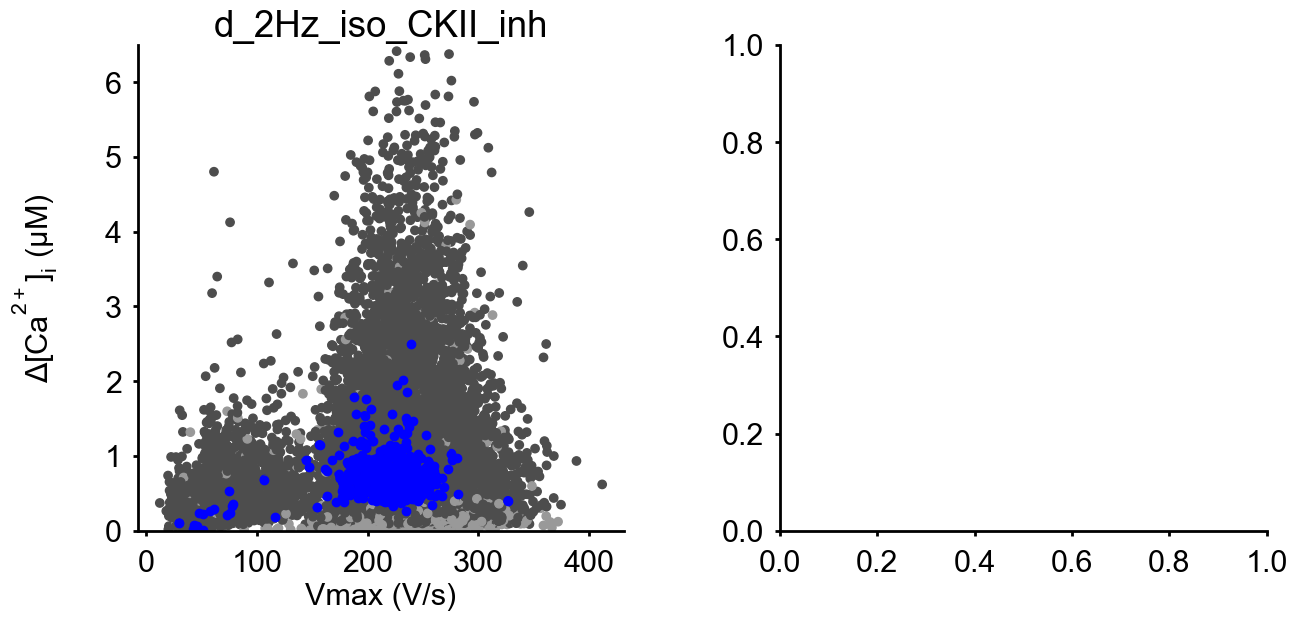

In [31]:
###################################################################################
fig = plt.figure(figsize=(8.4*1.6,6.15))
num_row = 1;
num_col = 2;
gs1 = gridspec.GridSpec(num_row,num_col);
panel = {};

for i in np.arange(num_row):
	for j in np.arange(num_col):
		panel[i,j] = plt.subplot(gs1[i,j]);
		ax = panel[i,j];


ax = panel[0,0];

ax.scatter(d_2Hz_iso_CKII_inh['Vmax_mean'], d_2Hz_iso_CKII_inh['CaT_mean'],c=d_2Hz_iso_CKII_inh['colors'])

ax.scatter(d_2Hz_iso_CKII_inh.loc[PV_sel,'Vmax_mean'], d_2Hz_iso_CKII_inh.loc[PV_sel,'CaT_mean'],c='b')
# ax.scatter([Vmax_ISO_2Hz], [CaT_ISO_2Hz], marker='^', c='r')

ax.set_title('d_2Hz_iso_CKII_inh')
# ax.set_xlabel('RMP (mV)')
ax.set_xlabel('Vmax (V/s)')
ax.set_ylabel('$\Delta[Ca^{2+}]_i$ ($\mu M$)')
ax.set_ylim([0,6.5])



for i in range(2):
	ax = fig.axes[i]
	# ax.spines['left'].set_position(('data', -100))
	ax.spines['right'].set_color('none')
	# ax.spines['bottom'].set_position(('data', 0))
	ax.spines['top'].set_color('none')
	# ax.spines['left'].set_smart_bounds(True)
	# ax.spines['bottom'].set_smart_bounds(True)
	ax.xaxis.set_ticks_position('bottom')
	ax.yaxis.set_ticks_position('left')
	ax.xaxis.set_tick_params(width=2)
	ax.yaxis.set_tick_params(width=2)

	# for i in range(0, len(sys.argv)-1):
	ax.spines['bottom'].set_linewidth(2)
	ax.spines['left'].set_linewidth(2)
	ax.spines['right'].set_linewidth(2)

	plt.subplots_adjust(left=0.12, bottom=0.15, right=0.96, top=0.94,
		wspace=0.32, hspace=0.30)
	ax.yaxis.set_label_coords(-0.16, 0.5)

# plt.savefig('Ito_react.pdf')
plt.savefig('d_2Hz_iso_CKII_inh_Vmax.png', dpi=300)
plt.show()


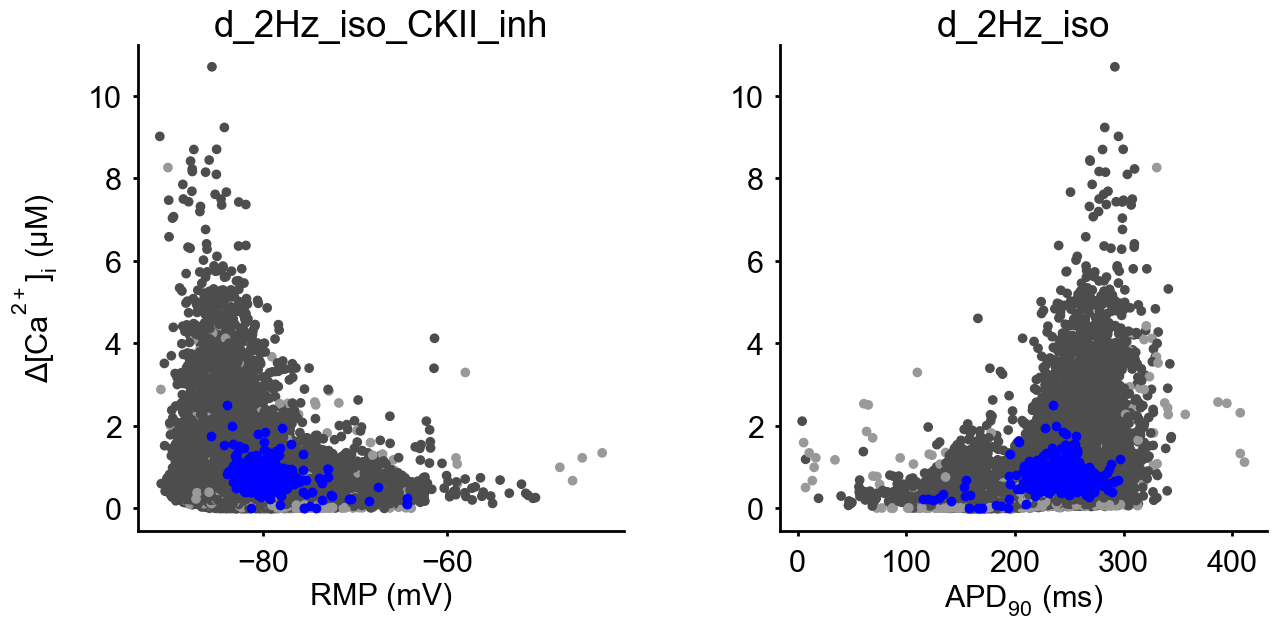

In [44]:
###################################################################################
fig = plt.figure(figsize=(8.4*1.6,6.15))
num_row = 1;
num_col = 2;
gs1 = gridspec.GridSpec(num_row,num_col);
panel = {};

for i in np.arange(num_row):
	for j in np.arange(num_col):
		panel[i,j] = plt.subplot(gs1[i,j]);
		ax = panel[i,j];


ax = panel[0,0];



ax.scatter(d_2Hz_iso_CKII_inh['RMP_mean'], d_2Hz_iso_CKII_inh['CaT_mean'],c=d_2Hz_iso_CKII_inh['colors'])

ax.scatter(d_2Hz_iso_CKII_inh.loc[PV_sel,'RMP_mean'], d_2Hz_iso_CKII_inh.loc[PV_sel,'CaT_mean'],c='b')
# ax.scatter([RMP_ISO_2Hz], [CaT_ISO_2Hz], marker='^', c='r')

ax.set_title('d_2Hz_iso_CKII_inh')
ax.set_xlabel('RMP (mV)')
ax.set_ylabel('$\Delta[Ca^{2+}]_i$ ($\mu M$)')
# ax.set_ylim([0,6.5])

ax = panel[0,1];
ax.scatter(d_2Hz_iso_CKII_inh['APD_mean'], d_2Hz_iso_CKII_inh['CaT_mean'],c=d_2Hz_iso_CKII_inh['colors'])  # using color defined by checking data at 1 Hz

ax.scatter(d_2Hz_iso_CKII_inh.loc[PV_sel,'APD_mean'], d_2Hz_iso_CKII_inh.loc[PV_sel,'CaT_mean'],c='b')
# ax.scatter([APD_ISO_2Hz], [CaT_ISO_2Hz], marker='^', c='r')
ax.set_title('d_2Hz_iso')
ax.set_xlabel('$APD_{90}$ (ms)')
# ax.set_ylim([0,6.5])




for i in range(2):
	ax = fig.axes[i]
	# ax.spines['left'].set_position(('data', -100))
	ax.spines['right'].set_color('none')
	# ax.spines['bottom'].set_position(('data', 0))
	ax.spines['top'].set_color('none')
	# ax.spines['left'].set_smart_bounds(True)
	# ax.spines['bottom'].set_smart_bounds(True)
	ax.xaxis.set_ticks_position('bottom')
	ax.yaxis.set_ticks_position('left')
	ax.xaxis.set_tick_params(width=2)
	ax.yaxis.set_tick_params(width=2)

	# for i in range(0, len(sys.argv)-1):
	ax.spines['bottom'].set_linewidth(2)
	ax.spines['left'].set_linewidth(2)
	ax.spines['right'].set_linewidth(2)

	plt.subplots_adjust(left=0.12, bottom=0.15, right=0.96, top=0.94,
		wspace=0.32, hspace=0.30)
	ax.yaxis.set_label_coords(-0.16, 0.5)

# plt.savefig('Ito_react.pdf')
plt.savefig('d_2Hz_iso_CKII_inh_RMP_Ca2+.png', dpi=300)
plt.show()

In [47]:
import seaborn as sns

/home/haibo/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 21.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/haibo/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 14.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/haibo/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 20.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

/home/haibo/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 35.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/haibo/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 26.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/haibo/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 34.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


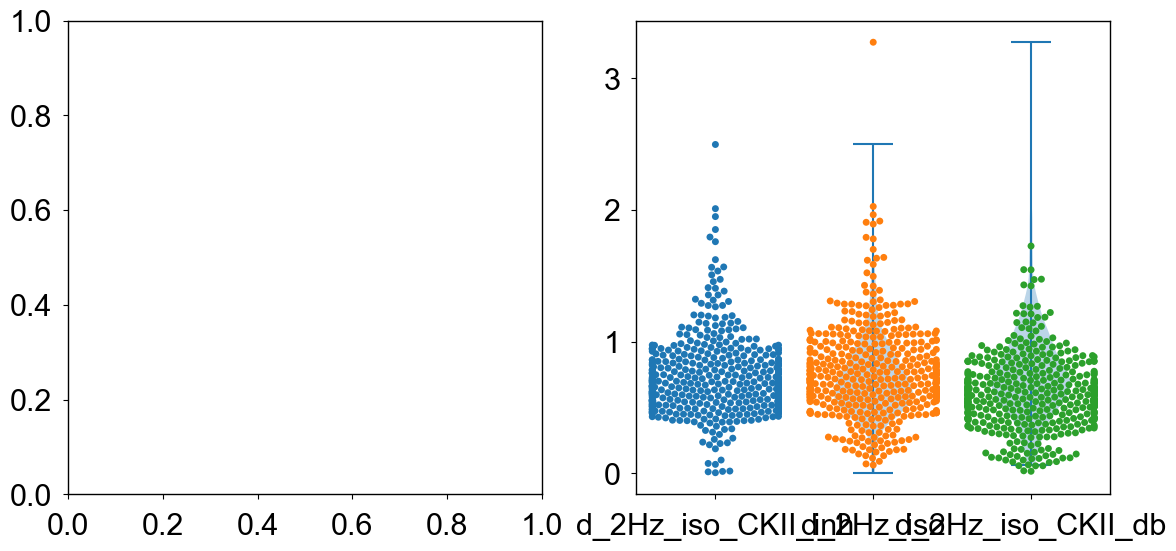

In [50]:
###################################################################################
fig = plt.figure(figsize=(8.4*1.6,6.15))
num_row = 1;
num_col = 2;
gs1 = gridspec.GridSpec(num_row,num_col);
panel = {};

for i in np.arange(num_row):
	for j in np.arange(num_col):
		panel[i,j] = plt.subplot(gs1[i,j]);
		ax = panel[i,j];


ax = panel[0,0];



d=pd.DataFrame()

d['d_2Hz_iso_CKII_inh'] = d_2Hz_iso_CKII_inh.loc[PV_sel,'CaT_mean'].values
d['d_2Hz_iso'] = d_2Hz_iso.loc[PV_sel,'CaT_mean'].values
d['d_2Hz_iso_CKII_db'] = d_2Hz_iso_CKII_db.loc[PV_sel,'CaT_mean'].values

plt.violinplot(d)

# d = pd.concat([d_2Hz_iso_CKII_inh.loc[PV_sel,'CaT_mean'].values,d_2Hz_iso.loc[PV_sel,'CaT_mean'].values,d_2Hz_iso_CKII_db.loc[PV_sel,'CaT_mean'].values])
sns.swarmplot(d)
